# Importing Pandas ,numpy and matplotlib

In [1]:
import pandas as pd #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #to plot graphs

In [51]:
df=pd.read_csv('Admission_Predict.csv')#read csv file
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [52]:

x=df.iloc[:,1:-1].values  #take all columns except 'serial no','chance of Admit'
y=df.iloc[:,-1].values    #take 'chance of admit' column in y variable
# print(x)
# print(y)

In [53]:
z=df.iloc[:,1:-1].columns #used to plot graph below

#Importing train_test_split from sklearn.model_selection
#training data

In [42]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.33,random_state=0)

In [25]:
x_tr.shape

(335, 7)

# Fitting train data 

In [44]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)

LinearRegression()

In [9]:
# intercept=lr.intercept_
# print(intercept)

In [27]:
importance = lr.coef_ 

# For test Data

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred=lr.predict(x_te)
mse=mean_squared_error(y_te,y_pred)
mae=mean_absolute_error(y_te,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_te,y_pred)
print('mse=',mse)
print('mae=',mae)
print('rmse=',rmse)
print('Goodness of fit=',r2)

mse= 0.004113016118289162
mae= 0.046120993263861196
rmse= 0.06413280064280026
Goodness of fit= 0.7699866157538676


# For train data

In [46]:
y_pred=lr.predict(x_tr)
mse=mean_squared_error(y_tr,y_pred)
mae=mean_absolute_error(y_tr,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_tr,y_pred)
print('mse=',mse)
print('mae=',mae)
print('rmse=',rmse)
print('Goodness of fit=',r2)

mse= 0.0033033206312563057
mae= 0.04136869080428357
rmse= 0.05747452158353565
Goodness of fit= 0.8403333722501105


In [49]:
#y_pred

In [50]:
#y_te

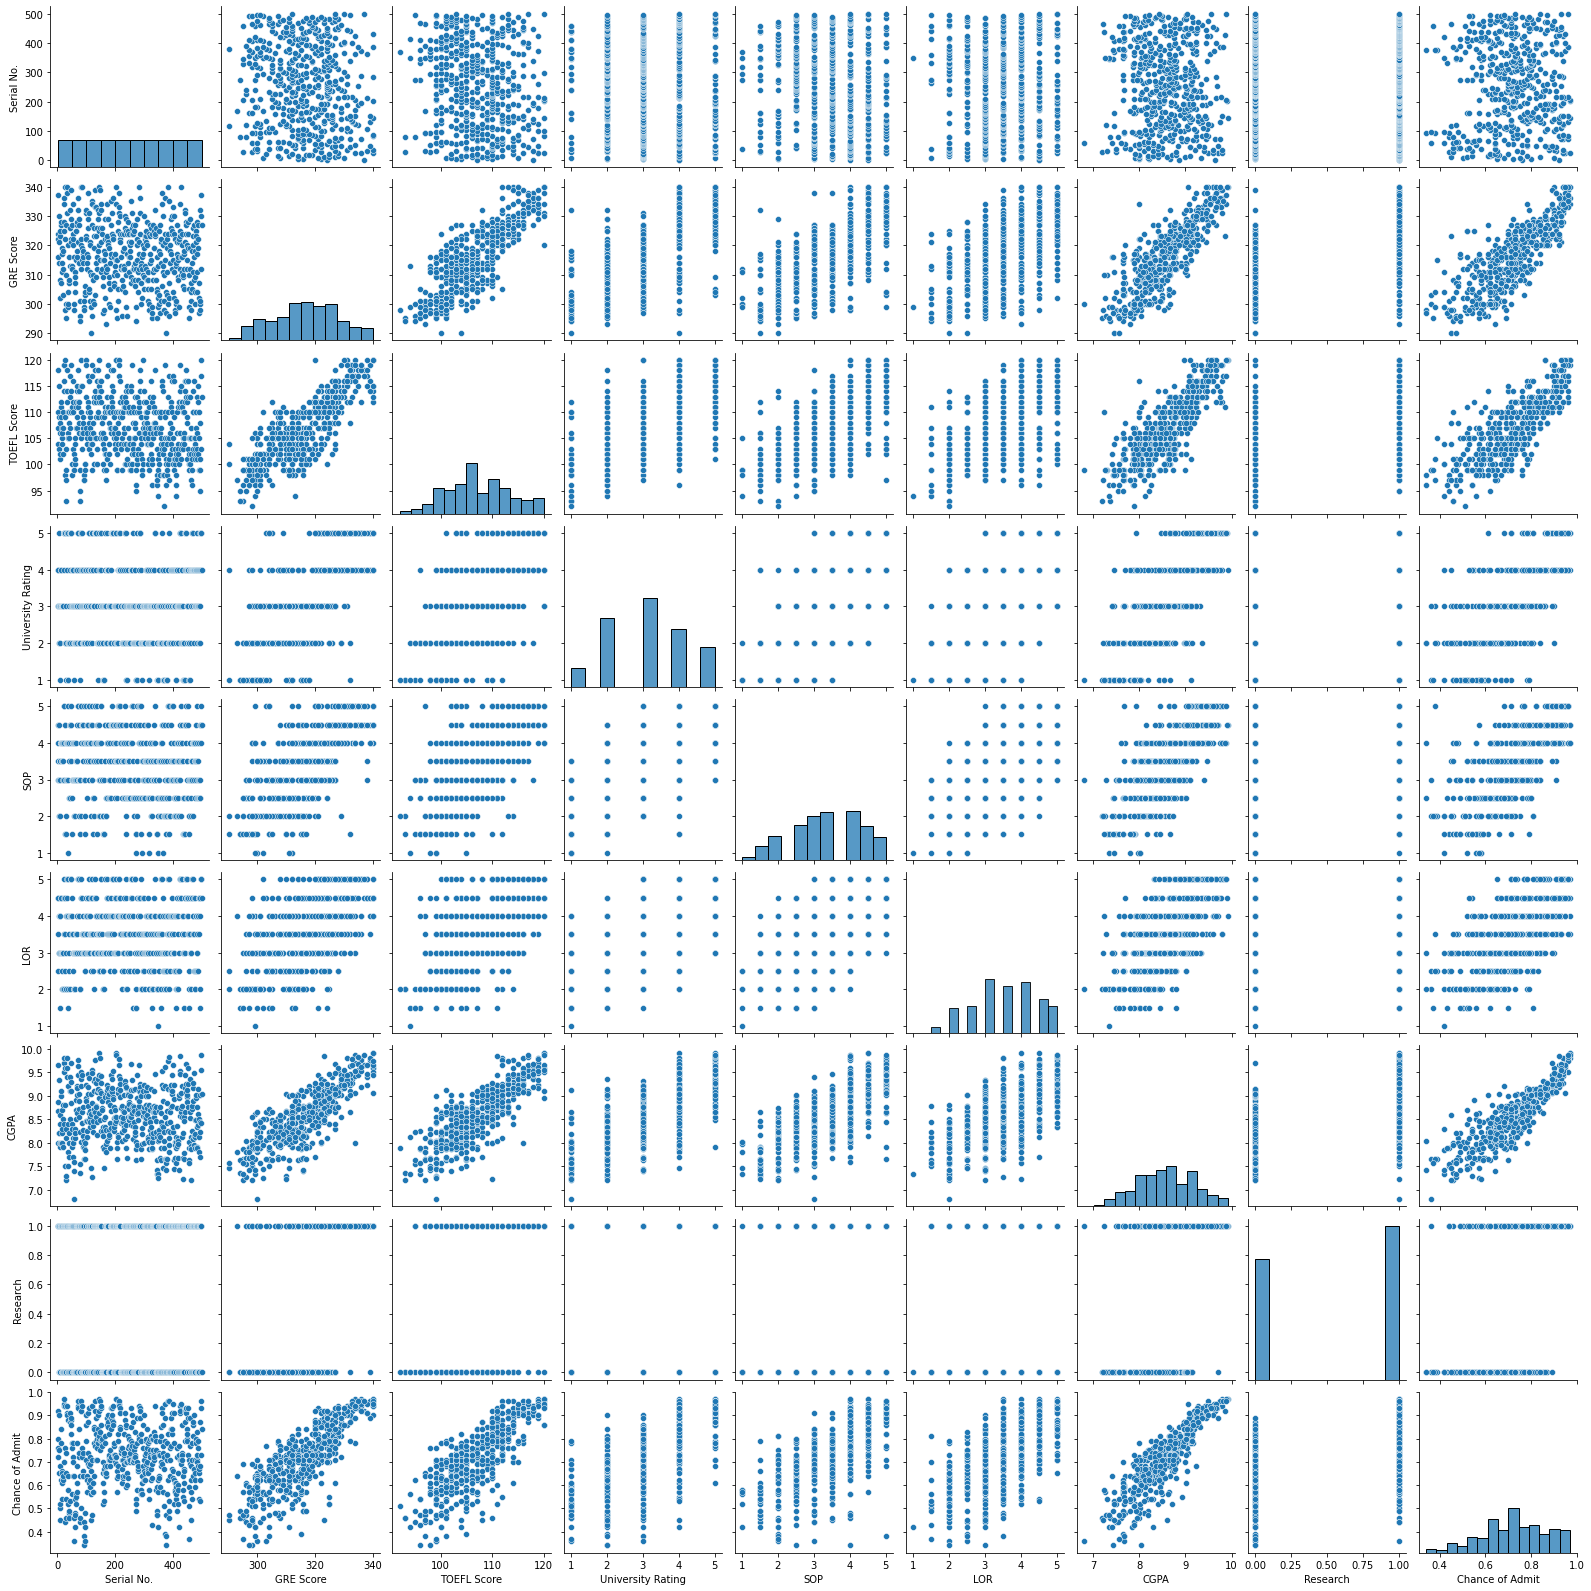

In [15]:
import seaborn as sns
sns.pairplot(df)

<AxesSubplot:>

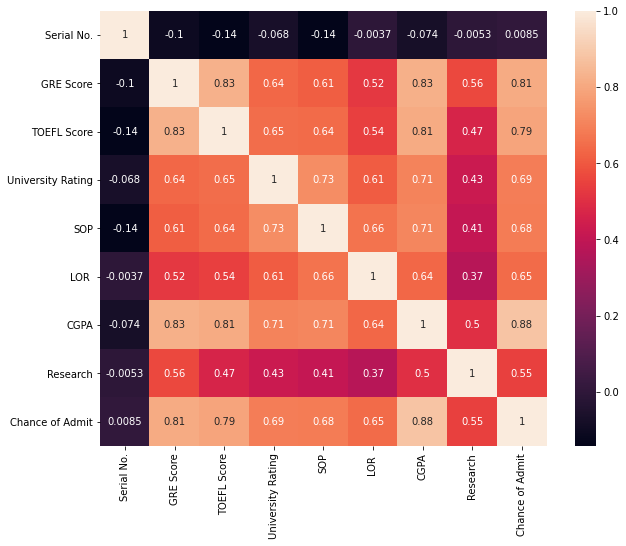

In [17]:
plt.figure(figsize=(10,8))
correlation_matrix = df.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)